In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

In [3]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Preprocessing

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


### Handling Categorical Values

In [7]:
# Identify categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

# Option 1: One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols)
print("Dataset after one-hot encoding:\n", df_one_hot)

# Option 2: Label Encoding
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()

# Iterate over each categorical column
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df_label_encoded[col] = label_encoder.fit_transform(df[col])

print("Dataset after label encoding:\n", df_label_encoded)

Dataset after one-hot encoding:
      Person ID  Age  Sleep Duration  Quality of Sleep  \
0            1   27             6.1                 6   
1            2   28             6.2                 6   
2            3   28             6.2                 6   
3            4   28             5.9                 4   
4            5   28             5.9                 4   
..         ...  ...             ...               ...   
369        370   59             8.1                 9   
370        371   59             8.0                 9   
371        372   59             8.1                 9   
372        373   59             8.1                 9   
373        374   59             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2                         60             8          75        10000  

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Option 1: Standardization (StandardScaler)
scaler = StandardScaler()
df_standardized = df.copy()

# Apply standardization on the numerical columns
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataset after standardization:\n", df_standardized)

Dataset after standardization:
      Person ID  Gender       Age            Occupation  Sleep Duration  \
0            1    Male -1.753096     Software Engineer       -1.298887   
1            2    Male -1.637643                Doctor       -1.173036   
2            3    Male -1.637643                Doctor       -1.173036   
3            4    Male -1.637643  Sales Representative       -1.550588   
4            5    Male -1.637643  Sales Representative       -1.550588   
..         ...     ...       ...                   ...             ...   
369        370  Female  1.941401                 Nurse        1.218127   
370        371  Female  1.941401                 Nurse        1.092276   
371        372  Female  1.941401                 Nurse        1.218127   
372        373  Female  1.941401                 Nurse        1.218127   
373        374  Female  1.941401                 Nurse        1.218127   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0 

In [9]:
# Option 2: Normalization (MinMaxScaler)
scaler = MinMaxScaler()
df_normalized = df.copy()

# Apply normalization on the numerical columns
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataset after normalization:\n", df_normalized)

Dataset after normalization:
      Person ID  Gender      Age            Occupation  Sleep Duration  \
0            1    Male  0.00000     Software Engineer        0.111111   
1            2    Male  0.03125                Doctor        0.148148   
2            3    Male  0.03125                Doctor        0.148148   
3            4    Male  0.03125  Sales Representative        0.037037   
4            5    Male  0.03125  Sales Representative        0.037037   
..         ...     ...      ...                   ...             ...   
369        370  Female  1.00000                 Nurse        0.851852   
370        371  Female  1.00000                 Nurse        0.814815   
371        372  Female  1.00000                 Nurse        0.851852   
372        373  Female  1.00000                 Nurse        0.851852   
373        374  Female  1.00000                 Nurse        0.851852   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0               

### Data Conversion

In [10]:
# Convert Blood Pressure column to numeric
df['Blood Pressure'] = pd.to_numeric(df['Blood Pressure'], errors='coerce')

# Convert Sleep Disorder column to boolean (presence: True, absence: False)
df['Sleep Disorder'] = df['Sleep Disorder'].map({'Yes': True, 'No': False})

In [11]:
# Convert specific columns to desired data types
df['Person ID'] = df['Person ID'].astype(str)  # Convert Person ID to string
df['Age'] = df['Age'].astype(int)  # Convert Age to integer
df['Gender'] = df['Gender'].astype('category')  # Convert Gender to categorical data type
df['Occupation'] = df['Occupation'].astype('category')  # Convert Occupation to categorical data type
df['BMI Category'] = df['BMI Category'].astype('category')  # Convert BMI Category to categorical data type

# Print the updated dataset
print("Dataset after further data conversion:\n", df)

Dataset after further data conversion:
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0           1    Male   27     Software Engineer             6.1   
1           2    Male   28                Doctor             6.2   
2           3    Male   28                Doctor             6.2   
3           4    Male   28  Sales Representative             5.9   
4           5    Male   28  Sales Representative             5.9   
..        ...     ...  ...                   ...             ...   
369       370  Female   59                 Nurse             8.1   
370       371  Female   59                 Nurse             8.0   
371       372  Female   59                 Nurse             8.1   
372       373  Female   59                 Nurse             8.1   
373       374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Ove

In [12]:
# Identify numerical columns with potential outliers
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Detect outliers using z-score method
z_threshold = 3  # Adjust the threshold as needed

df_no_outliers = df.copy()

for col in numerical_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df_no_outliers = df_no_outliers[z_scores <= z_threshold]

# Print the dataset after removing outliers
print("Dataset after removing outliers:\n", df_no_outliers)

Dataset after removing outliers:
     Person ID  Gender  Age         Occupation  Sleep Duration  \
0           1    Male   27  Software Engineer             6.1   
1           2    Male   28             Doctor             6.2   
2           3    Male   28             Doctor             6.2   
6           7    Male   29            Teacher             6.3   
7           8    Male   29             Doctor             7.8   
..        ...     ...  ...                ...             ...   
369       370  Female   59              Nurse             8.1   
370       371  Female   59              Nurse             8.0   
371       372  Female   59              Nurse             8.1   
372       373  Female   59              Nurse             8.1   
373       374  Female   59              Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6          

/tmp/ipykernel_20/1506958799.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[z_scores <= z_threshold]


## Exploratory Data Analysis

In [13]:
# Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Blood Pressure  Heart Rate   Daily Steps  
count    374.000000             0.0  374.000000    374.000000  
mean       5.385027             NaN   70.165775   6816.844920  
std        1.774526             NaN    4.135676   1617.915679  
mi

In [14]:
# Perform statistical tests to validate relationships
from scipy.stats import pearsonr

sleep_duration = df['Sleep Duration']
quality_of_sleep = df['Quality of Sleep']
correlation, p_value = pearsonr(sleep_duration, quality_of_sleep)
print(f"Pearson correlation coefficient between Sleep Duration and Quality of Sleep: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between Sleep Duration and Quality of Sleep: 0.8832130004106182
P-value: 2.170991770864778e-124


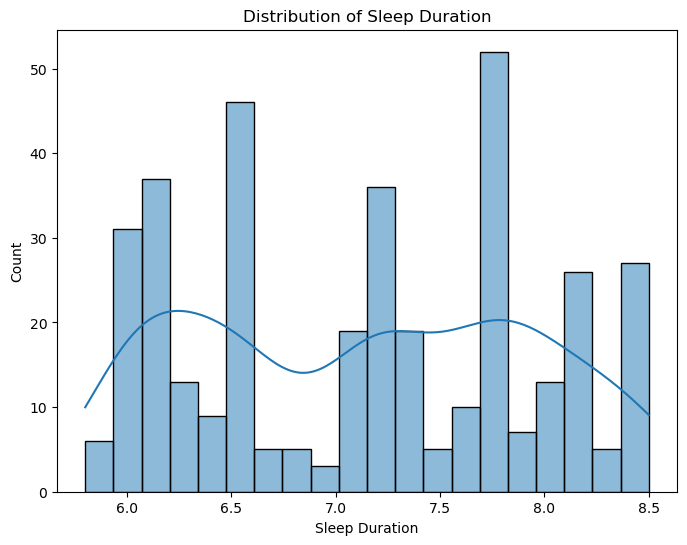

In [15]:
# Distribution of Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sleep Duration', bins=20, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_20/2378208912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


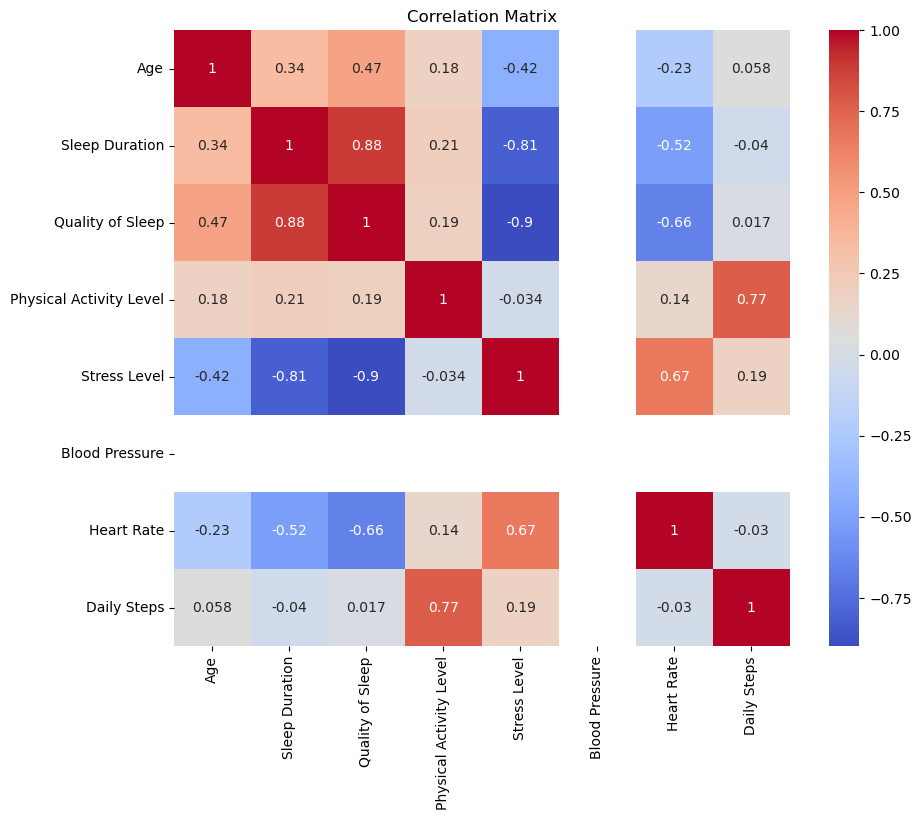

In [16]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

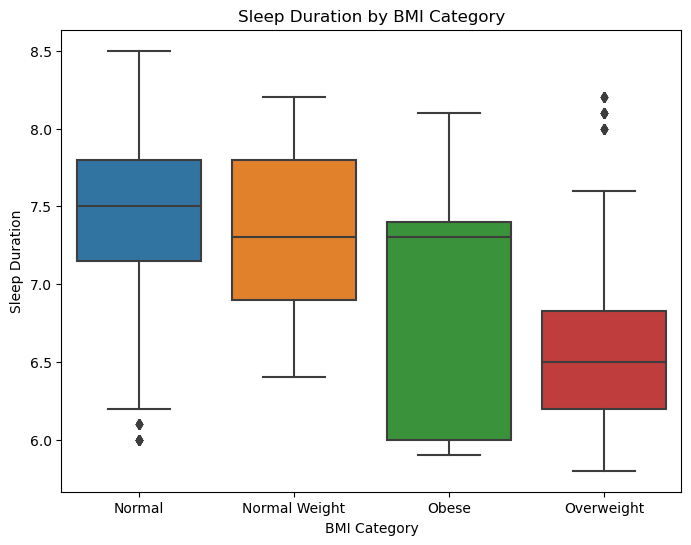

In [17]:
# Box plot of Sleep Duration by BMI Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration')
plt.title("Sleep Duration by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration")
plt.show()

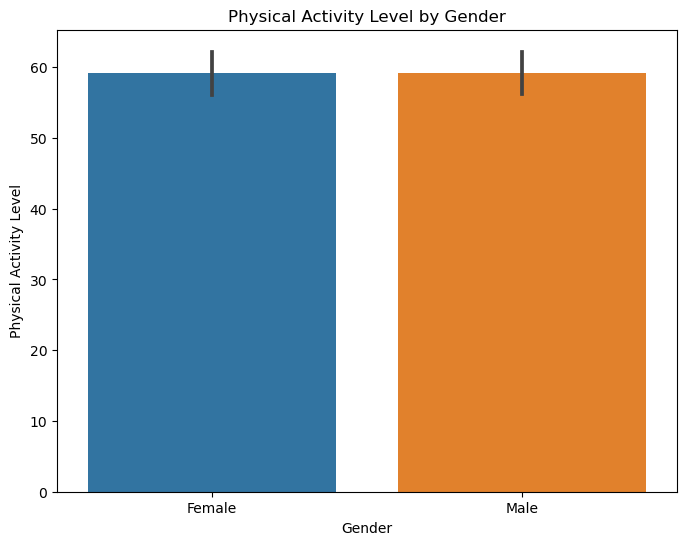

In [18]:
# Bar plot of Physical Activity Level by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Physical Activity Level')
plt.title("Physical Activity Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Physical Activity Level")
plt.show()

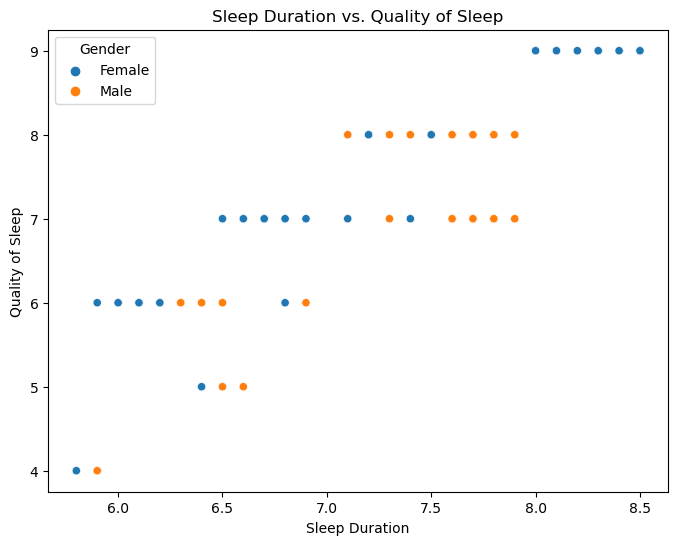

In [19]:
# Scatter plot of Sleep Duration vs. Quality of Sleep
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Gender')
plt.title("Sleep Duration vs. Quality of Sleep")
plt.xlabel("Sleep Duration")
plt.ylabel("Quality of Sleep")
plt.show()

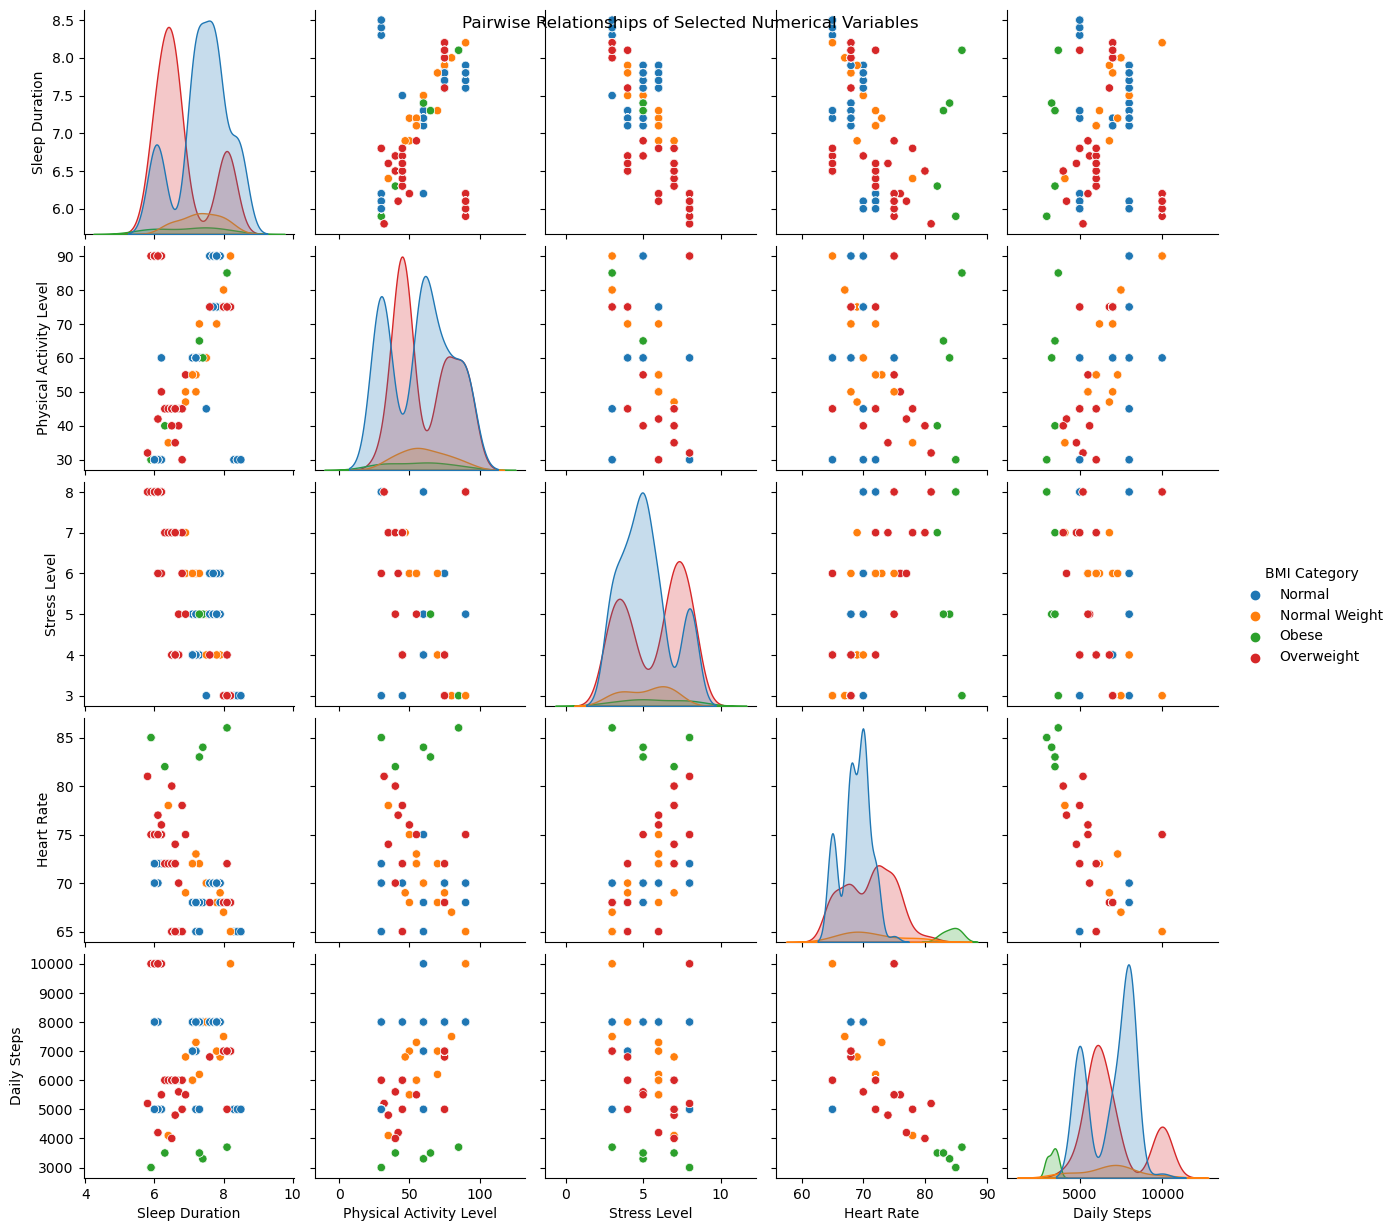

In [20]:
# Pairplot of selected numerical columns
selected_cols = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
sns.pairplot(data=df, vars=selected_cols, hue='BMI Category')
plt.suptitle("Pairwise Relationships of Selected Numerical Variables")
plt.show()

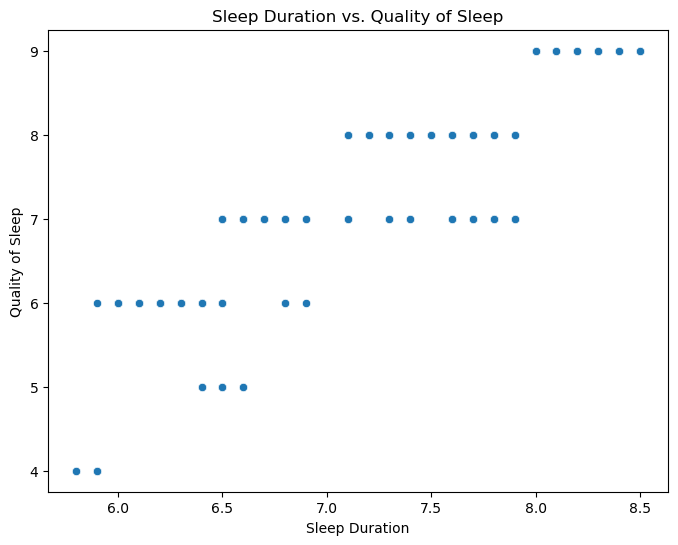

In [21]:
# Explore specific relationships with scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title("Sleep Duration vs. Quality of Sleep")
plt.xlabel("Sleep Duration")
plt.ylabel("Quality of Sleep")
plt.show()

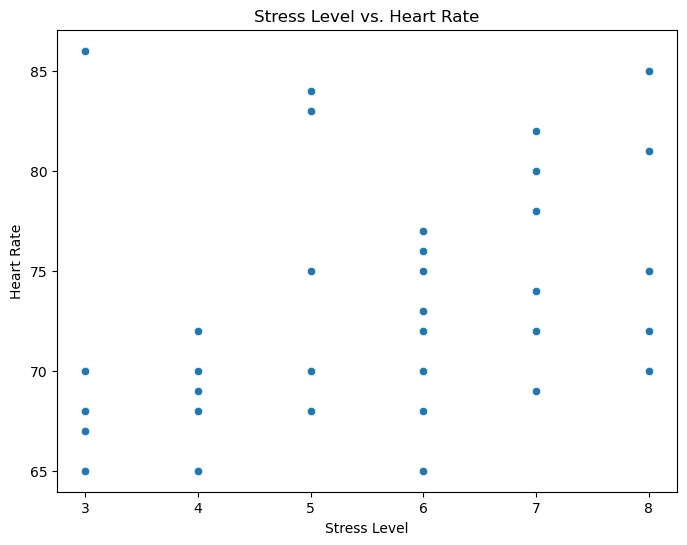

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Stress Level', y='Heart Rate')
plt.title("Stress Level vs. Heart Rate")
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate")
plt.show()